# Data Cleaning / Wrangling

**Goal** : gather all the data in one clean csv file


## Step 1 : get consumption

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df1 = pd.read_csv("./data/eco2mix_regional_cons_def.csv", delimiter=";",parse_dates=["Date - Heure"])

In [16]:
df1.head(1)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,11,Ile-de-France,Données consolidées,2017-05-06,01:00,2017-05-05 23:00:00,6734.0,-1.0,NaN,30.0,0.0,8.0,NaN,158.0,6540.0


In [21]:
consumption = df1[["Date - Heure","Consommation (MW)"]].copy().sort_values(by=['Date - Heure'])

In [22]:
consumption.head()

,Date - Heure,Consommation (MW)
65437,2012-12-31 23:00:00,NaN
62313,2012-12-31 23:30:00,9134.0
65438,2013-01-01 00:00:00,8822.0
62314,2013-01-01 00:30:00,8499.0
24112,2013-01-01 01:00:00,8229.0


In [23]:
# Count duplicates
# Identical dates
print(consumption.duplicated(subset='Date - Heure').sum())
# Identical dates and conso
print(consumption.duplicated().sum())

12
5


We have duplicated dates with different consumptions, **interesting** !

In [26]:
# Remove duplicates
consumption.drop_duplicates(inplace=True, subset='Date - Heure')

In [27]:
# Rename columns
consumption.columns = ['Date', 'Conso']

In [28]:
consumption.head()

,Date,Conso
65437,2012-12-31 23:00:00,NaN
62313,2012-12-31 23:30:00,9134.0
65438,2013-01-01 00:00:00,8822.0
62314,2013-01-01 00:30:00,8499.0
24112,2013-01-01 01:00:00,8229.0


In [43]:
# Check days with missing half hours
count_half_hours = consumption.set_index('Date').resample('D').count()
count_half_hours[count_half_hours['Conso'] != 48]

,Conso
Date,
2012-12-31,1
2013-10-27,46
2014-10-26,46
2015-10-25,46
2016-10-30,46
2017-10-29,46
2018-04-30,44


We have days with less that 48 half hours, **interesting** !

## Step 3 : get all half hours

In [46]:
date_range = pd.date_range(start=consumption['Date'].min(),end=consumption['Date'].max(),freq='30min')
half_hours = pd.DataFrame(date_range,columns=['Date'])

In [47]:
half_hours

,Date
0,2012-12-31 23:00:00
1,2012-12-31 23:30:00
2,2013-01-01 00:00:00
3,2013-01-01 00:30:00
4,2013-01-01 01:00:00
5,2013-01-01 01:30:00
6,2013-01-01 02:00:00
7,2013-01-01 02:30:00
8,2013-01-01 03:00:00
9,2013-01-01 03:30:00


## Step 2 : get temperatures

In [88]:
df2 = pd.read_csv("./data/meteo-paris.csv")

In [89]:
df2.head(1)

,dt,dt_iso,city_id,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1349096400,2012-10-01 13:00:00 +0000 UTC,2988507,NaN,NaN,NaN,293.32,291.15,298.15,1017,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,Sky is Clear,01d


In [90]:
df2['dt'] = pd.to_datetime(df2['dt'],unit='s',utc=True)

In [91]:
weather = df2[['dt','temp']].copy()
weather.columns = ['Date', 'Temp']

In [92]:
weather.head(3)

,Date,Temp
0,2012-10-01 13:00:00+00:00,293.320000
1,2012-10-01 14:00:00+00:00,293.324271
2,2012-10-01 15:00:00+00:00,293.334926


In [93]:
# Count duplicates
weather.duplicated().sum()

3404

In [94]:
# Remove duplicates
weather.drop_duplicates(inplace=True,subset='Date')

In [101]:
weather['Date'] = weather['Date'].dt.tz_convert('Europe/Paris').dt.tz_localize(None)

## Step 3 : Merge everything together

[Documentation on how to merge with pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)


![How to merge](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg)


**Inner Merge / Inner join** – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.

**Left Merge / Left outer join** – Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.

**Right Merge / Right outer join** – Keep every row in the right dataframe. Where there are missing values of the “on” variable in the left column, add empty / NaN values in the result.

**Outer Merge / Full outer join** – A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

### Merge consumption and weather

In [103]:
print("Consumption shape",consumption.shape)
print("Weather shape",weather.shape)

leftmerge = pd.merge(consumption,weather,on='Date',how="left")
innermerge = pd.merge(consumption,weather,on='Date',how="inner")

print("Left merge", leftmerge.shape)
print("Inner merge", innermerge.shape)

Consumption shape (93396, 2)
Weather shape (45410, 2)
Left merge (93401, 3)
Inner merge (43212, 3)


### Merge with dates

In [104]:
df = pd.merge(half_hours,leftmerge,on='Date',how="left")

In [105]:
df.shape

(93411, 3)

In [108]:
df.head(100)

,Conso,Temp
Date,,
2012-12-31 23:00:00,NaN,278.9100
2012-12-31 23:30:00,9134.0,NaN
2013-01-01 00:00:00,8822.0,278.9100
2013-01-01 00:30:00,8499.0,NaN
2013-01-01 01:00:00,8229.0,278.9100
2013-01-01 01:30:00,8150.0,NaN
2013-01-01 02:00:00,7848.0,278.9100
2013-01-01 02:30:00,7667.0,NaN
2013-01-01 03:00:00,7440.0,278.9100


In [109]:
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

KeyError: 'Date'

# Step 4 : interpolate missing temperatures
We want to keep our historical consumptions (which are precious) so we will interpolate missing values for temperature

First question : where are missing values ?

In [110]:
df.interpolate('linear',limit=4,inplace=True)

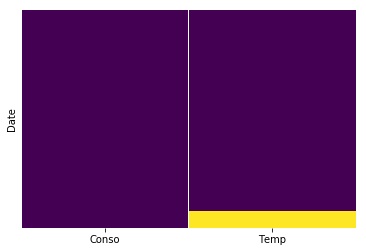

In [113]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
weather['Date'].max()

Timestamp('2017-12-06 15:00:00')

In [115]:
df[:'2017-12-05'].isnull().sum()

Conso    1
Temp     0
dtype: int64

In [116]:
df.head(10)

,Conso,Temp
Date,,
2012-12-31 23:00:00,NaN,278.91
2012-12-31 23:30:00,9134.0,278.91
2013-01-01 00:00:00,8822.0,278.91
2013-01-01 00:30:00,8499.0,278.91
2013-01-01 01:00:00,8229.0,278.91
2013-01-01 01:30:00,8150.0,278.91
2013-01-01 02:00:00,7848.0,278.91
2013-01-01 02:30:00,7667.0,278.91
2013-01-01 03:00:00,7440.0,278.91


# Step 5 : Automate everything : 

In [129]:
def get_data(consumption_csv="./data/eco2mix_regional_cons_def.csv",weather_csv="./data/meteo-paris.csv"):
    """
    A function to get consumption and weather data
    Do the wrangling
    And return a nice & compact dataframe
    Temperatures are in °C
    
    """
    # consumptions
    consumption =  pd.read_csv(consumption_csv, delimiter=";",parse_dates=["Date - Heure"], usecols = ["Date - Heure","Consommation (MW)"])
    consumption.drop_duplicates(inplace=True,subset='Date - Heure')
    consumption.columns = ['Date', 'Conso']
    # half hours
    dates = []
    date_range = pd.date_range(start=consumption['Date'].min(),end=consumption['Date'].max(),freq='30min')
    half_hours = pd.DataFrame(date_range,columns=['Date'])
    # weather
    weather = pd.read_csv(weather_csv,usecols=['dt','temp'])
    weather['dt'] = pd.to_datetime(weather['dt'],unit='s',utc=True)
    weather.columns = ['Date', 'Temp']
    weather.drop_duplicates(inplace=True,subset='Date')
    weather['Date'] = weather['Date'].dt.tz_convert('Europe/Paris').dt.tz_localize(None)
    # Merging
    df1 = pd.merge(consumption,weather,on='Date',how="left")
    df2 = pd.merge(half_hours,df1,on='Date',how="left")
    df2.interpolate('linear',limit=4,inplace=True)
    df2["Temp"] = df2["Temp"] - 273.15
    return df2.dropna()

In [128]:
help(get_data)

Help on function get_data in module __main__:

get_data(consumption_csv='./data/eco2mix_regional_cons_def.csv', weather_csv='./data/meteo-paris.csv')
    A function to get consumption and weather data
    Do the wrangling
    And return a nice & compact dataframe



In [130]:
df = get_data()

In [132]:
df.head()

,Date,Conso,Temp
1,2012-12-31 23:30:00,9134.0,5.76
2,2013-01-01 00:00:00,8822.0,5.76
3,2013-01-01 00:30:00,8499.0,5.76
4,2013-01-01 01:00:00,8229.0,5.76
5,2013-01-01 01:30:00,8150.0,5.76


In [ ]:
df.index.max()

In [ ]:
df.isnull().sum()

In [120]:
dfn= get_data()

In [121]:
dfn.head()

,Date,Conso,Temp
1,2012-12-31 23:30:00,9134.0,5.76
2,2013-01-01 00:00:00,8822.0,5.76
3,2013-01-01 00:30:00,8499.0,5.76
4,2013-01-01 01:00:00,8229.0,5.76
5,2013-01-01 01:30:00,8150.0,5.76


# That's Clean !